# Question 3: Simulation

Statistiques sommaires des rendements simulés :

                              Moyenne  Écart-type  Asymétrie  \
Normale standard               0.0054      0.9958    -0.0157   
Student-t (df=3, normalisée)   0.0080      0.9652     0.6167   

                              Aplatissement (kurtosis)  
Normale standard                               -0.0455  
Student-t (df=3, normalisée)                   18.2832   



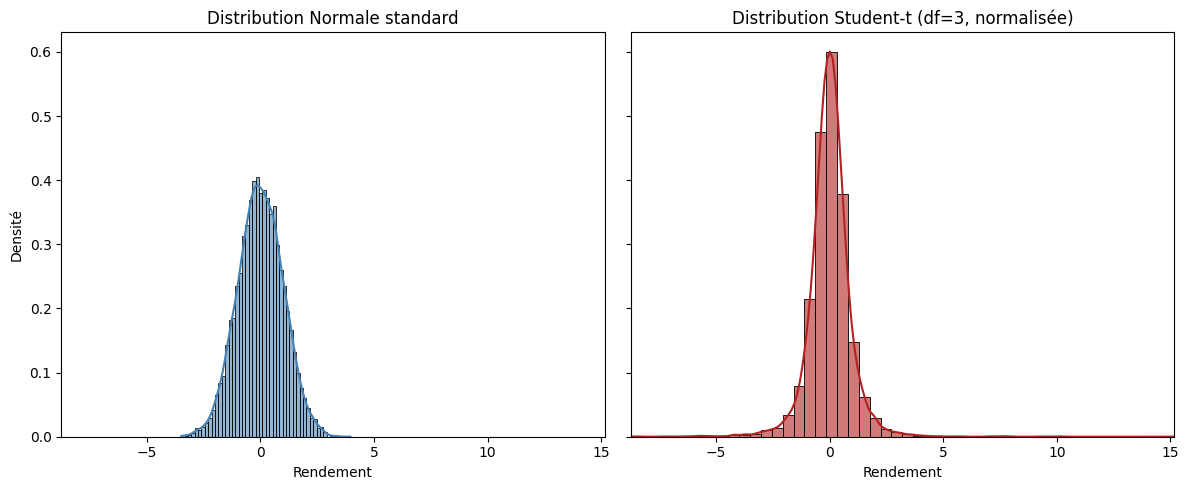

In [ ]:
# Question 3 a.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 1. Paramètres de simulation
n = 10_000        # longueur des séries de rendements (déterminée de manière arbitraire)
df = 3            # degrés de liberté pour la Student-t (mentionnée dans l'énoncé)
np.random.seed(11) # Fixe la graine du générateur de nombres aléatoires pour que les résultats soient reproductibles (donc les mêmes à chaque exécution). Le nombre 11 a été choisi arbitrairement.

# 2. Génération des rendements
returns_normal = np.random.normal(loc=0, scale=1, size=n) # Normal (0,1)
returns_t = np.random.standard_t(df=df, size=n) # Student-t(df)

# 3. Normalisation de la variance
var_t_theoretical = df / (df - 2)  # variance théorique Student-t(df)
scale_factor = np.sqrt(1 / var_t_theoretical) # calcul de combien réduire l’échelle pour normaliser la variance à 1
returns_t_scaled = returns_t * scale_factor  # application de la réduction d'échelle

# 4. Statistiques sommaires
def summary_stats(data):
    return {
        "Moyenne": np.mean(data),
        "Écart-type": np.std(data, ddof=1),
        "Asymétrie": skew(data),
        "Aplatissement (kurtosis)": kurtosis(data, fisher=True)}

stats_normal = summary_stats(returns_normal)
stats_t = summary_stats(returns_t_scaled)

summary_df = pd.DataFrame([stats_normal, stats_t], index=["Normale standard", "Student-t (df=3, normalisée)"])

print("Statistiques sommaires des rendements simulés :\n")
print(summary_df.round(4), "\n")

# 5. Visualisation : deux graphiques côte à côte avec mêmes axes afin de faciliter la comparaison
# Déterminer les mêmes limites sur x et y
x_min = min(returns_normal.min(), returns_t_scaled.min())
x_max = max(returns_normal.max(), returns_t_scaled.max())

# Préparer la figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Graphique 1 : Normale
sns.histplot(returns_normal, bins=50, kde=True, stat="density", color="steelblue", alpha=0.6, ax=axes[0])
axes[0].set_title("Distribution Normale standard")
axes[0].set_xlabel("Rendement")
axes[0].set_ylabel("Densité")
axes[0].set_xlim(x_min, x_max)

# Graphique 2 : Student-t
sns.histplot(returns_t_scaled, bins=50, kde=True, stat="density", color="firebrick", alpha=0.6, ax=axes[1])
axes[1].set_title("Distribution Student-t (df=3, normalisée)")
axes[1].set_xlabel("Rendement")
axes[1].set_ylabel("Densité")
axes[1].set_xlim(x_min, x_max)

# Ajustement de la mise en page
plt.tight_layout()
plt.show()
